# ERC-4626: all vaults on a particular chain

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 23,993 vaults in the database and 13,408,030 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 2,961,245 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 10:13:15  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 11:13:20  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 12:13:25  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   

                                                        address  block_number  \
timestamp                                                                       
2024-01-11 09:13:06  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169318721   
2024-01-11 10:13:15  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169333121   
2024-01-11 11:13:20  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169347521   
2024-01-11 12:13:25  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169361921   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2024-01-11 09:13:06         1.00          1.00          1.00              NaN   
2024-01-11 10:13:15         1.00          1.00          1.00              NaN   
2024-01-11 11:13:20         1.00          1.00          1.00              NaN   
2024-01-11 12:13:25         1.00          1.00          1.00              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2024-01-11 09:13:06             NaN         Staked USDA (Arbitrum) #6436   
2024-01-11 10:13:15             NaN         Staked USDA (Arbitrum) #6436   
2024-01-11 11:13:20             NaN         Staked USDA (Arbitrum) #6436   
2024-01-11 12:13:25             NaN         Staked USDA (Arbitrum) #6436   

                     event_count            protocol  raw_share_price  \
timestamp                                                               
2024-01-11 09:13:06       127123  <unknown ERC-4626>             1.00   
2024-01-11 10:13:15       127123  <unknown ERC-4626>             1.00   
2024-01-11 11:13:20       127123  <unknown ERC-4626>             1.00   
2024-01-11 12:13:25       127123  <unknown ERC-4626>             1.00   

                     returns_1h  avg_assets_by_vault  dynamic_tvl_threshold  \
timestamp                                                                     
2024-01-11 09:13:06        0.00                 1.00                   0.02   
2024-01-11 10:13:15        0.00                 1.00                   0.02   
2024-01-11 11:13:20        0.00                 1.00                   0.02   
2024-01-11 12:13:25        0.00                 1.00                   0.02   

                     tvl_filtering_mask  
timestamp                                
2024-01-11 09:13:06                True  
2024-01-11 10:13:15                True  
2024-01-11 11:13:20                True  
2024-01-11 12:13:25                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 292 vaults out of total of 5,646 vaults on chain Arbitrum, having 708,572 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4                   NAV                          218852.566660400704649665
5              Protocol                                 <unknown ERC-4626>
6              Mgmt fee                                               None
7              Perf fee                                               None
8           Deposit fee                                               0.00
9          Withdraw fee                                               0.00
10               Shares                          157940.074220509572793378
11           First seen                                2022-08-26 11:27:33
12             Features                                                   
13              Lock up                                               None
14      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
15  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
16         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/129 [00:00<?, ?it/s]

Cleaning metrics for 129 vaults
Vault entries with too high NAV values filtered out: 1
Vault entries with too small ATH NAV values filtered out: 7
Vaults abnormally high returns: 4
Vault entries with too few deposit and redeem events (min 25) filtered out: 12
Calculated lifetime metrics for 104 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  lifetime_return_net  cagr  cagr_net  \
58              HYPE++             0.39                 0.32  0.42      0.33   
43  Plutus Hedge Token             0.16                 0.14  0.21      0.19   

    three_months_returns  three_months_returns_net  three_months_cagr  \
58                  0.04                      0.03               0.18   
43                  0.05                      0.04               0.21   

    three_months_cagr_net  three_months_sharpe  three_months_sharpe_net  \
58                   0.14                 2.76                     2.76   
43                   0.18                 2.77                     2.77   

    three_months_volatility  one_month_returns  one_month_returns_net  \
58                     0.06               0.03                   0.02   
43                     0.07               0.02                   0.02   

    one_month_cagr  one_month_cagr_net denomination     chain     peak_nav  \
58            0.37                0.29         USDC  Arbitrum 6,241,538.82   
43            0.25                0.22         USDC  Arbitrum   260,513.81   

    current_nav  years  mgmt_fee  perf_fee  deposit_fee  withdraw_fee  \
58 3,541,406.72   0.96      0.00      0.20         0.00          0.00   
43   212,984.11   0.76      0.00      0.12         0.00          0.00   

   fee_label           lockup  event_count    protocol  \
58  0% / 20% 30 days 16:00:00          224  D2 Finance   
43  0% / 12%              NaT           75      Plutus   

                         risk  risk_numeric  \
58    VaultTechnicalRisk.high         30.00   
43  VaultTechnicalRisk.severe         40.00   

                                                  id          start_date  \
58  42161-0x75288264fdfea8ce68e6d852696ab1ce2f3e5004 2024-11-20 08:20:28   
43  42161-0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a 2025-01-29 16:59:55   

              end_date                                     address  chain_id  \
58 2025-11-04 20:38:40  0x75288264fdfea8ce68e6d852696ab1ce2f3e5004     42161   
43 2025-11-04 20:38:40  0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a     42161   

    stablecoinish     last_updated_at  last_updated_block       features  
58           True 2025-11-04 20:38:40           396824321      [d2_like]  
43           True 2025-11-04 20:38:40           396824321  [plutus_like]

## Top vault list

- List top vaults on the chain, formatted for readability



In [15]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 100 vaults.
Last update 2025-11-04 20:38:40
Formatted data for 99 vaults.
Top 99 vaults by 1 month annualised return are: HYPE++, Plutus Hedge Token, gmUSDC, Harvest: USDC Vault (0x2d5F), Gains Network USDC, USDn2, Staked USDai, Silo Finance Borrowable USDC Deposit in ARB Silo, Silo Finance Borrowable USDC Deposit, SiloId: 146, USDC-2 yVault, Concrete USDC MultiSig Strategy, Nashpoint DeFi & RWA Fund, Clearstar High Yield USDC, Gains Network DAI, Autopilot USDC Arbitrum, Yield Chasing Silo USDC, LazyVault_LowerRisk_USDC, Clearstar USDC Reactor, Silo Finance Borrowable USDC Deposit, SiloId: 145, Yield Chasing crvUSD, Tokemak arbUSD, Yield Chasing USDC, autoSUSDai, Harvest: USDC Vault (0x4A8e), Curve Vault for crvUSD, MEV Capital USDC, Avantgarde USDC Core Arbitrum, Hyperithm USDC, Dolomite: USDC, Saving USX, Dolomite: USDT, K3 Capital USDai USDC, Yearn Degen USDC, Prime Tether USD, gmUSDC, DAMM Stablecoin Fund, Gauntlet USDC Core, Euler E

Name  \
#                                                       
1                                              HYPE++   
2                                  Plutus Hedge Token   
3                                              gmUSDC   
4                        Harvest: USDC Vault (0x2d5F)   
5                                  Gains Network USDC   
6                                               USDn2   
7                                        Staked USDai   
8    Silo Finance Borrowable USDC Deposit in ARB Silo   
9   Silo Finance Borrowable USDC Deposit, SiloId: 146   
10                                      USDC-2 yVault   
11                    Concrete USDC MultiSig Strategy   
12                          Nashpoint DeFi & RWA Fund   
13                          Clearstar High Yield USDC   
14                                  Gains Network DAI   
15                            Autopilot USDC Arbitrum   
16                            Yield Chasing Silo USDC   
17                           LazyVault_LowerRisk_USDC   
18                             Clearstar USDC Reactor   
19  Silo Finance Borrowable USDC Deposit, SiloId: 145   
20                               Yield Chasing crvUSD   
21                                     Tokemak arbUSD   
22                                 Yield Chasing USDC   
23                                         autoSUSDai   
24                       Harvest: USDC Vault (0x4A8e)   
25                             Curve Vault for crvUSD   
26                                   MEV Capital USDC   
27                      Avantgarde USDC Core Arbitrum   
28                                     Hyperithm USDC   
29                                     Dolomite: USDC   
30                                         Saving USX   
31                                     Dolomite: USDT   
32                              K3 Capital USDai USDC   
33                                   Yearn Degen USDC   
34                                   Prime Tether USD   
35                                             gmUSDC   
36                               DAMM Stablecoin Fund   
37                                 Gauntlet USDC Core   
38                                    Euler Earn USDC   
39                          Euler Arbitrum Yield USDC   
40                         Steakhouse High Yield USDC   
41                                        Staked USDX   
42                                Euler Arbitrum USDC   
43                              Steakhouse Prime USDC   
44                                 Frontier Theo USDC   
45                                   Spark USDC Vault   
46                      BasisOS USDC-LINK Hyperliquid   
47                             K3 Capital USDai USDT0   
48                             Curve Vault for crvUSD   
49                                      Yearn OG USDC   
50                 Peapods Interest Bearing USDC - 25   
51                          Static Aave Arbitrum USDT   
52                         Wrapped Aave Arbitrum USDT   
53                                Gauntlet USDC Prime   
54                                    Fluid Gho Token   
55                         Static Aave Arbitrum USDCn   
56                        Wrapped Aave Arbitrum USDCn   
57                                        dForce USDC   
58                   Crypto.com Defi Wallet AAVE USDT   
59                          Wrapped Aave Arbitrum GHO   
60                                     Fluid USD Coin   
61                           LazyVault_LowerRisk_USDT   
62               Crypto.com Defi Wallet Compound USDC   
63                   Crypto.com Defi Wallet AAVE USDC   
64                    Concrete USDC MultiSig Strategy   
65                                   Fluid Tether USD   
66                         fija Strategy USDC AaveOpt   
67                                        Staked EURA   
68                             Curve Vault for crvUSD   
69                                          autoUSDai   
70

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

Skipping vault 42161-0x4785df09013c1c492504fb4688ed3f320c964c9c: Concrete USDC MultiSig Strategy due to missing fee data
Skipping vault 42161-0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9: Silo Finance Borrowable USDC Deposit, SiloId: 146 due to missing fee data


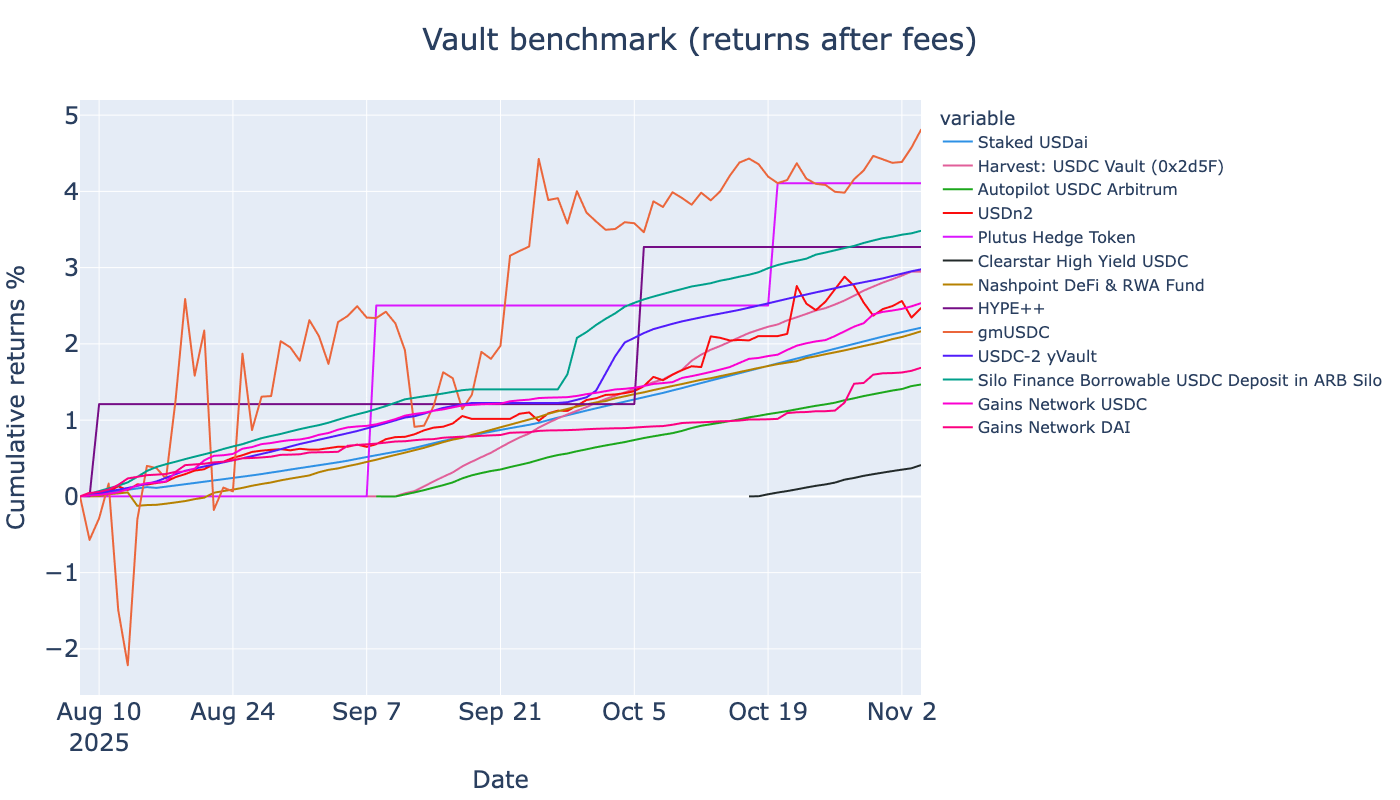

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

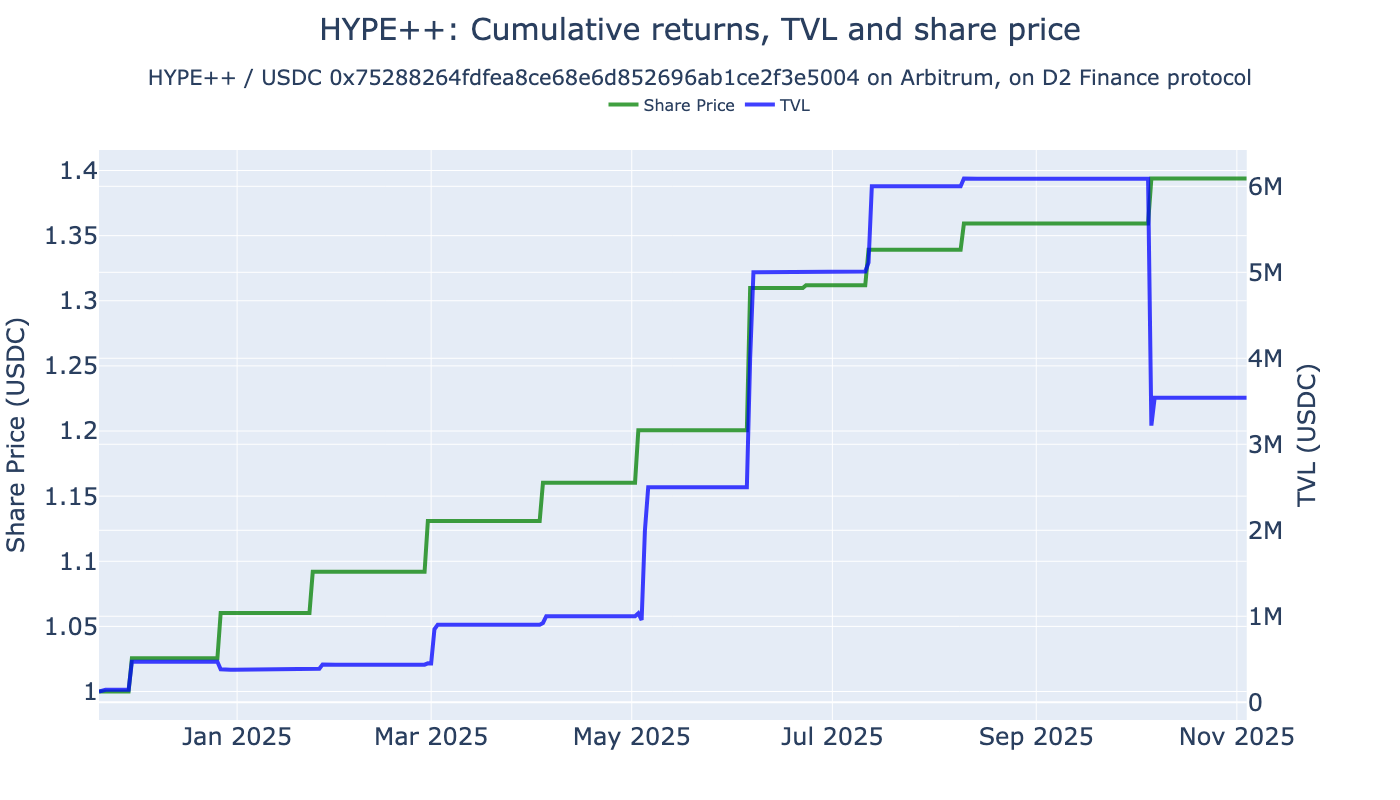

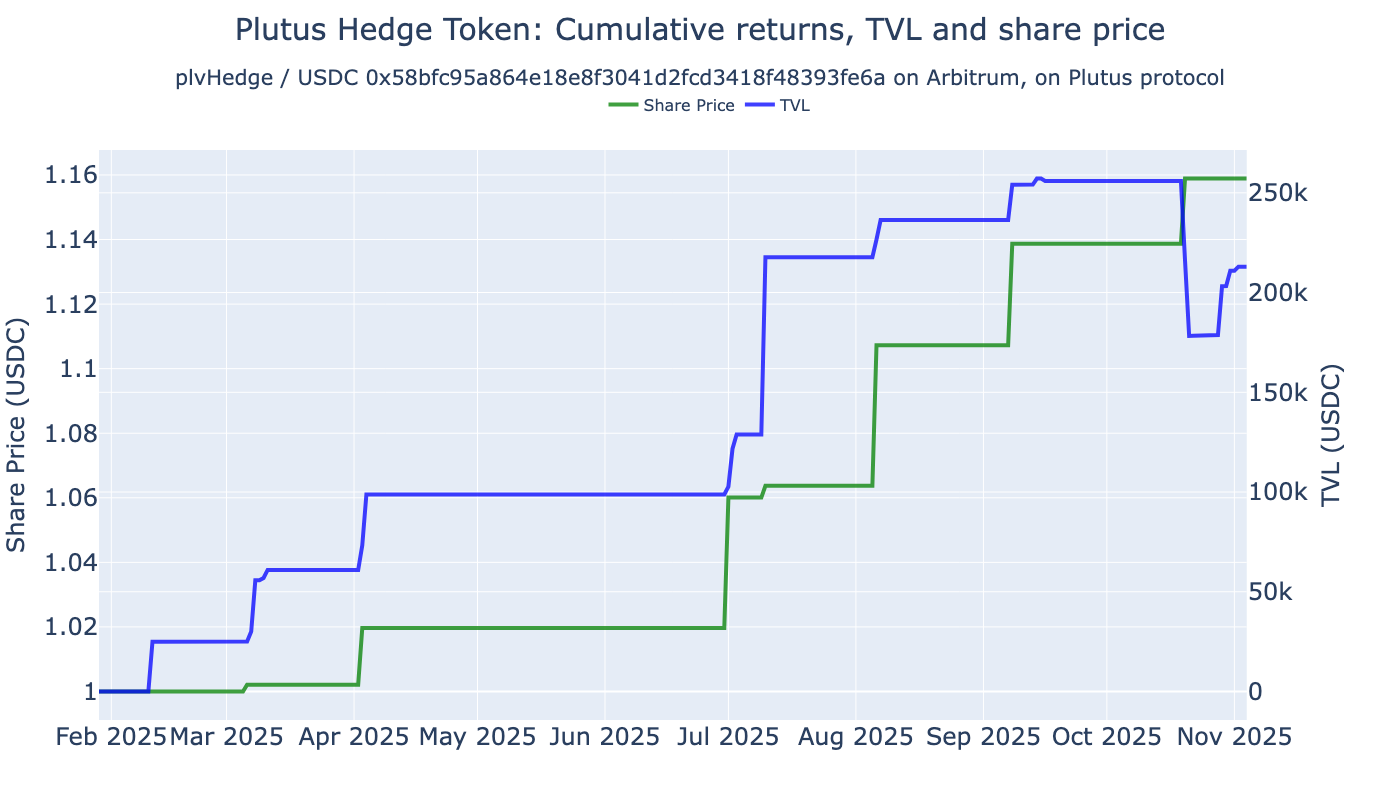

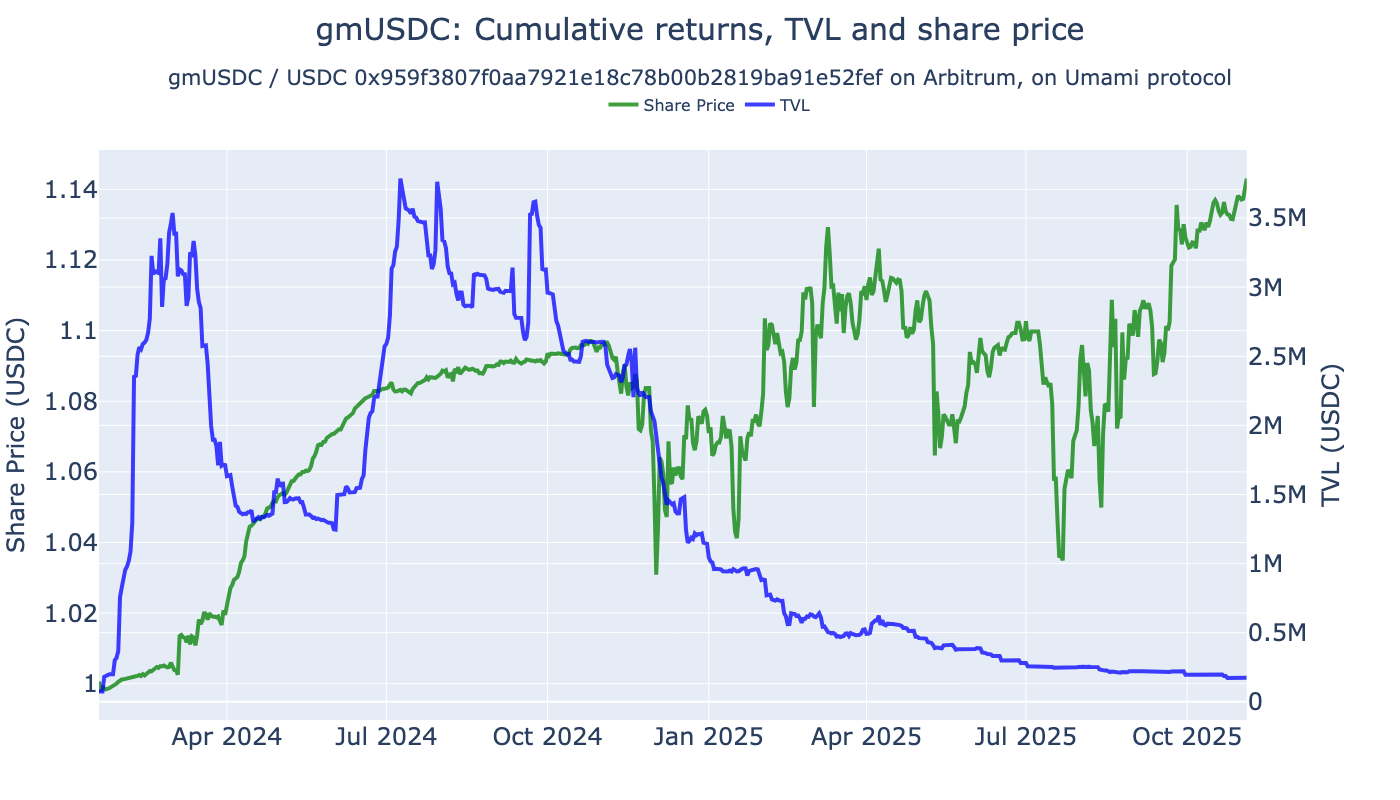

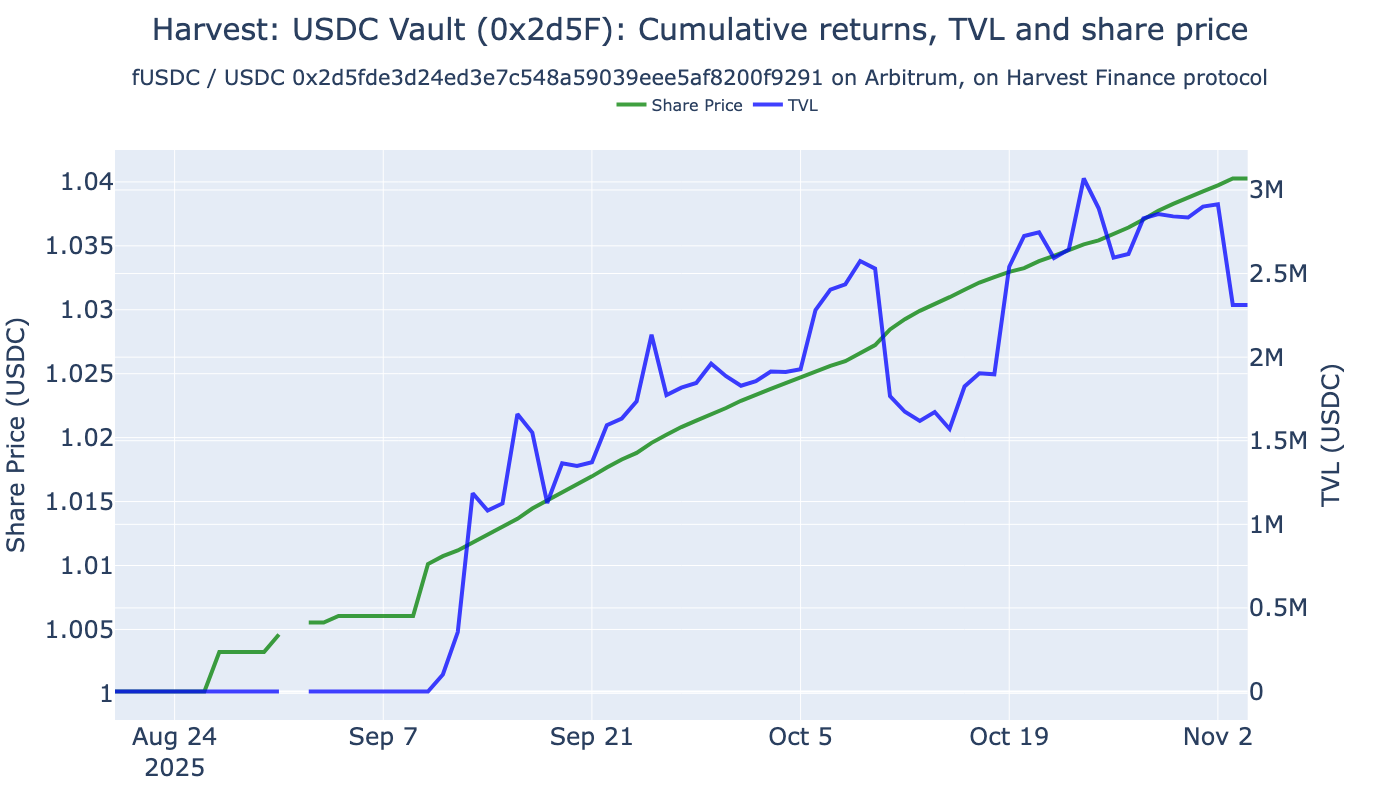

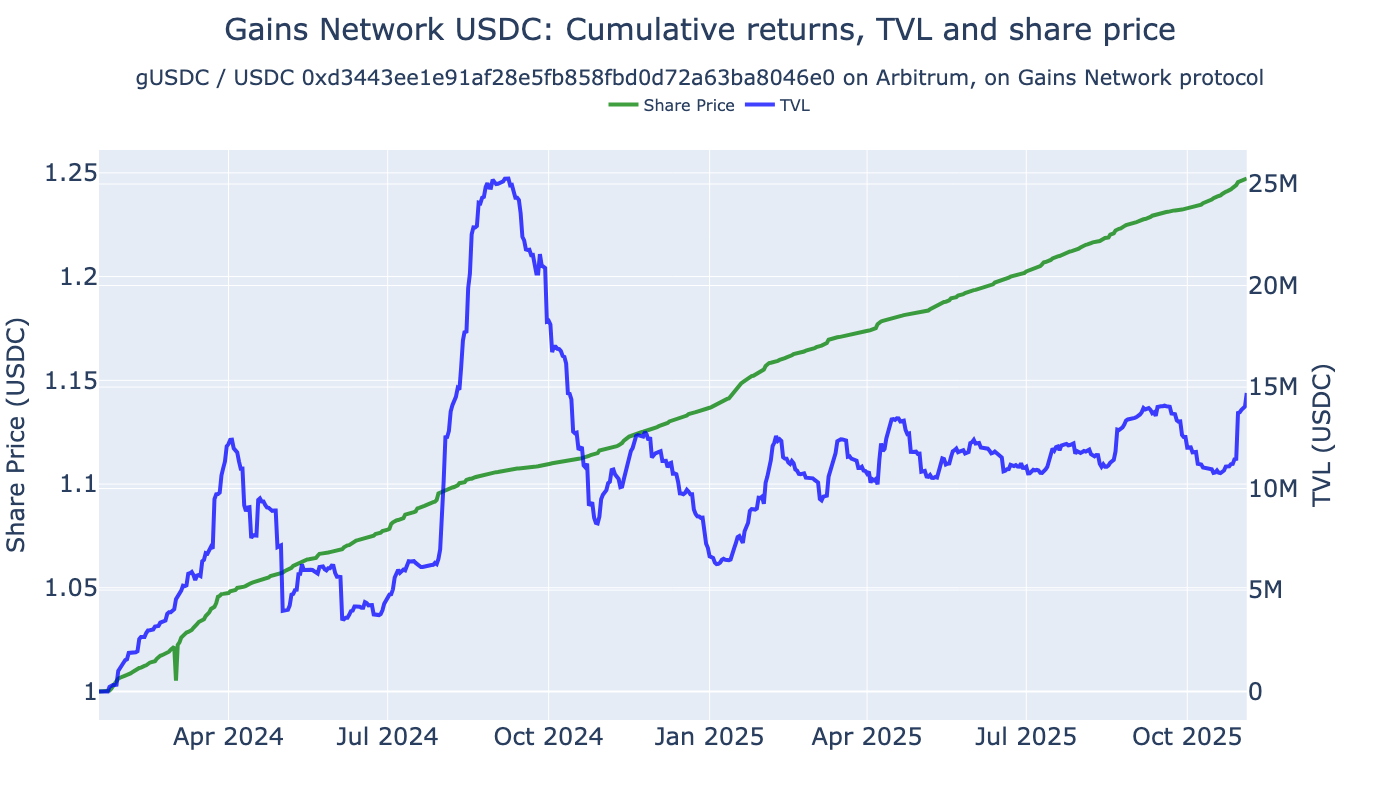

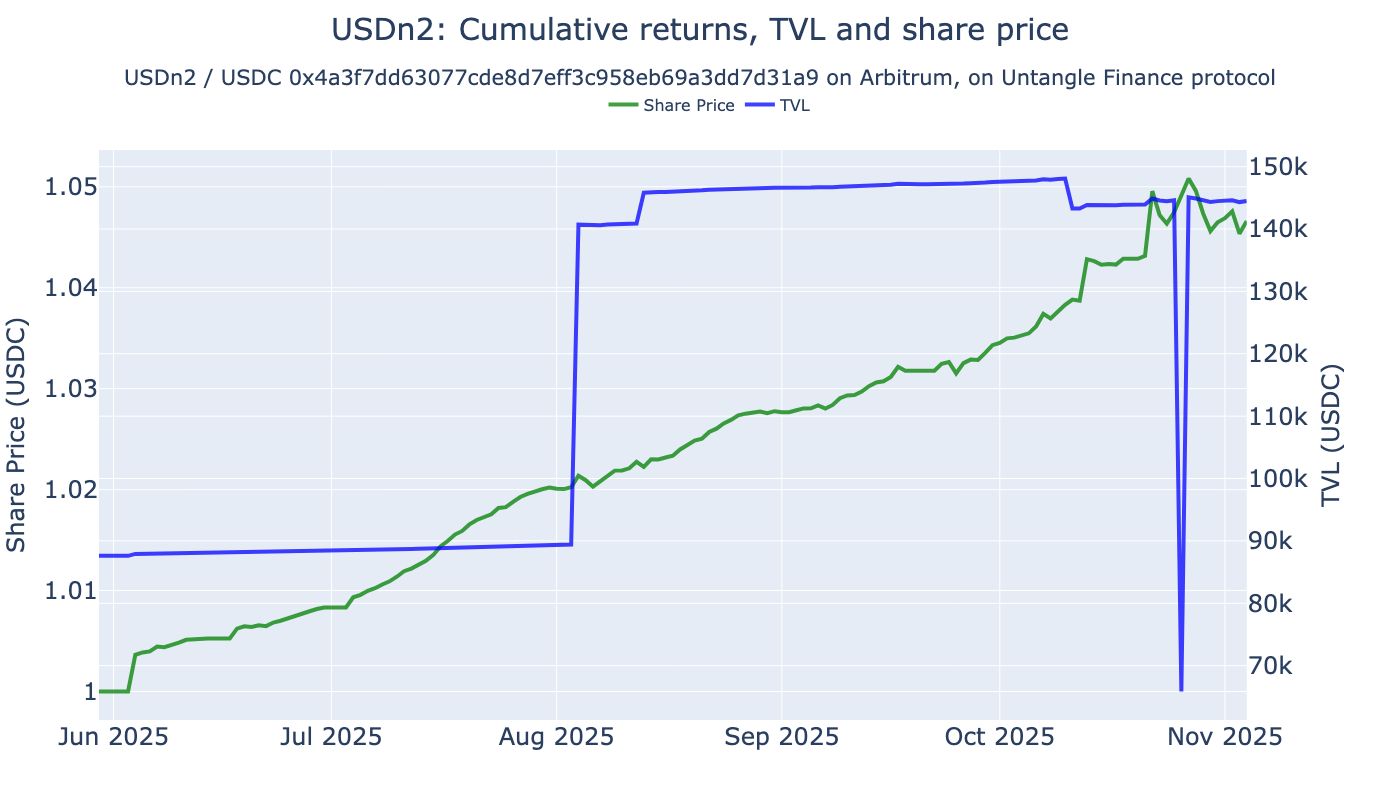

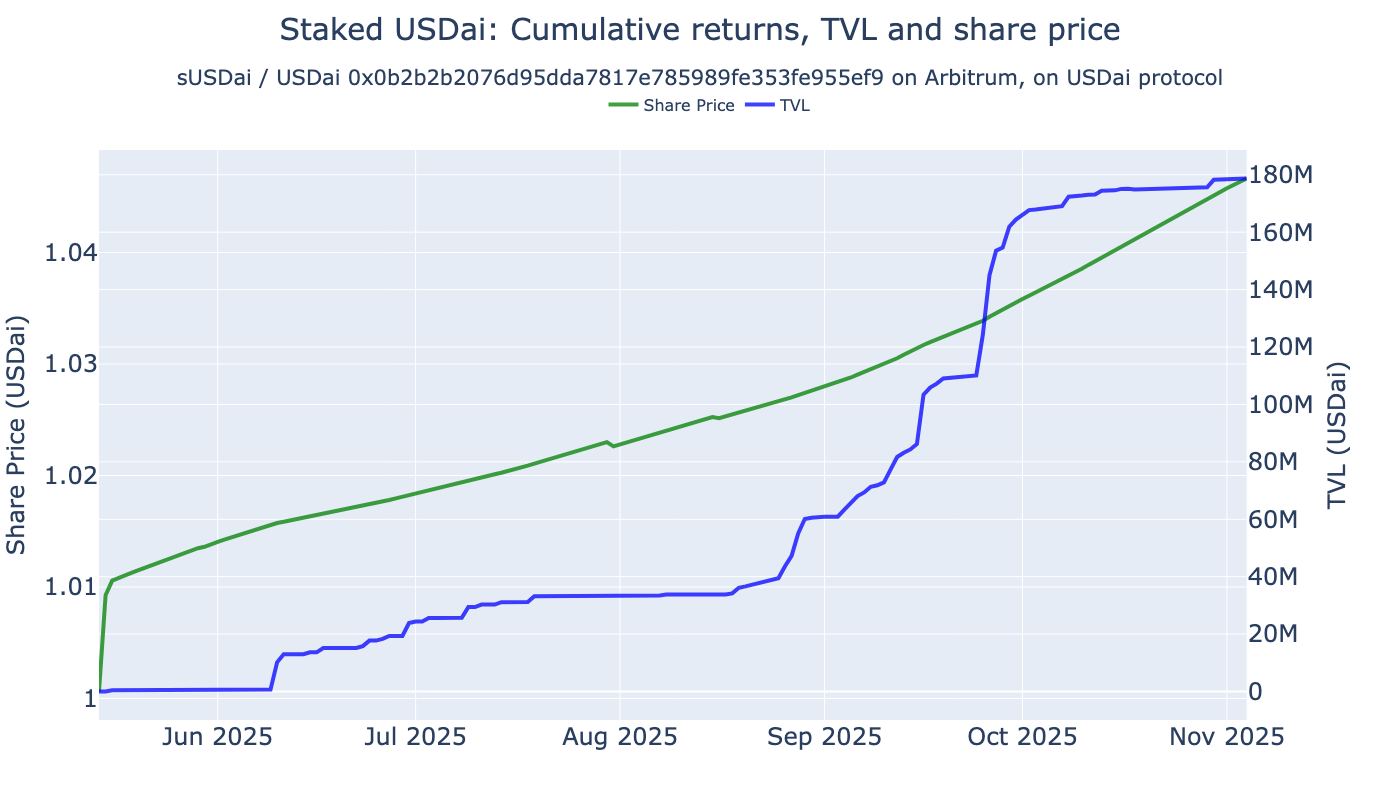

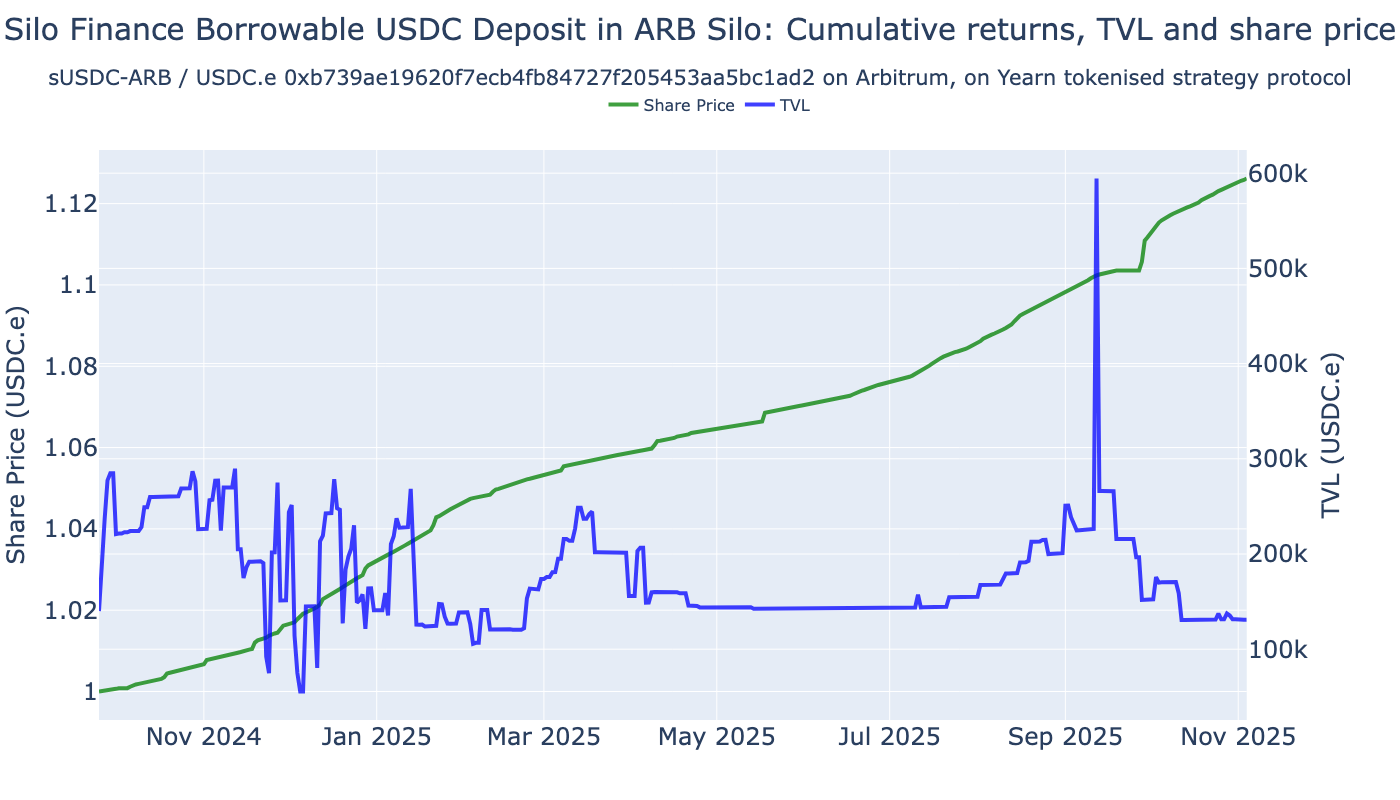

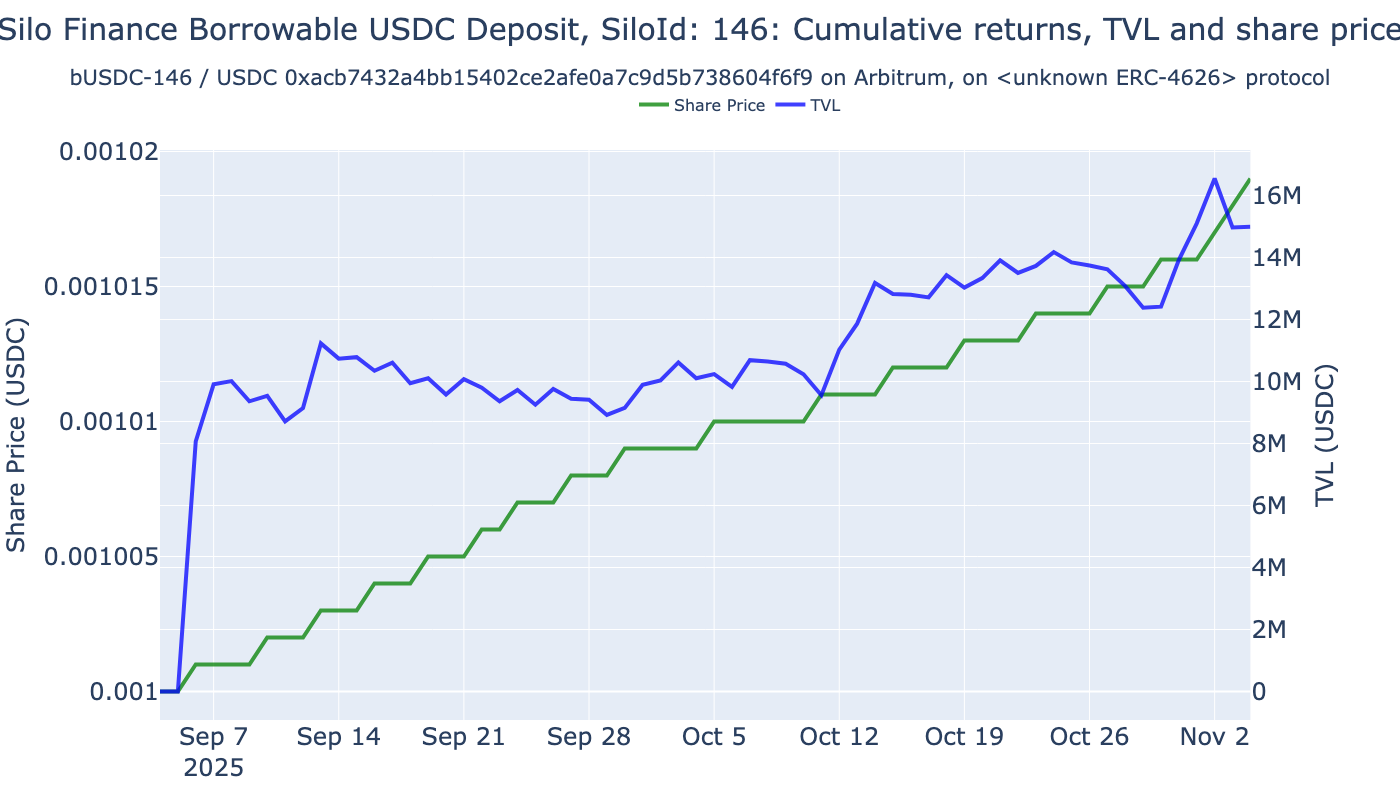

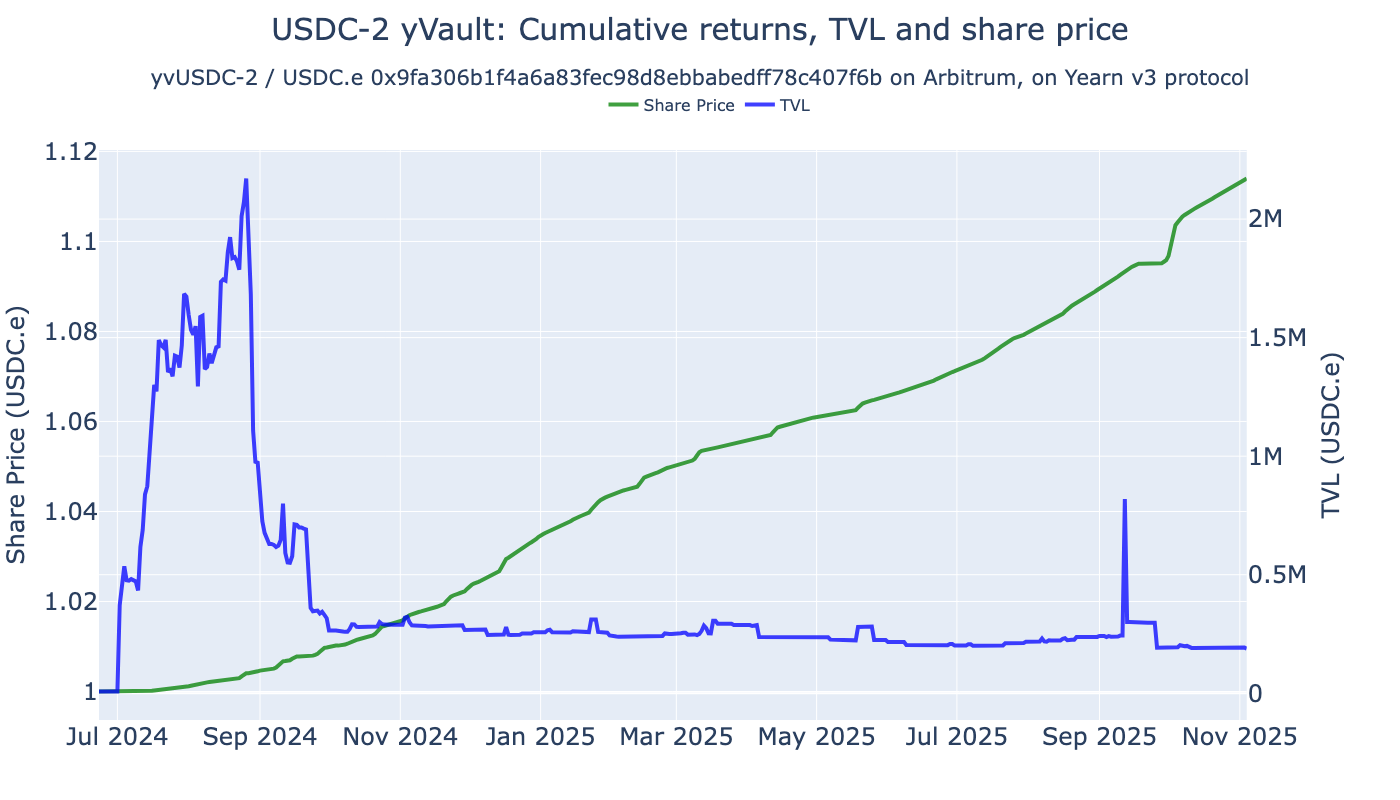

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

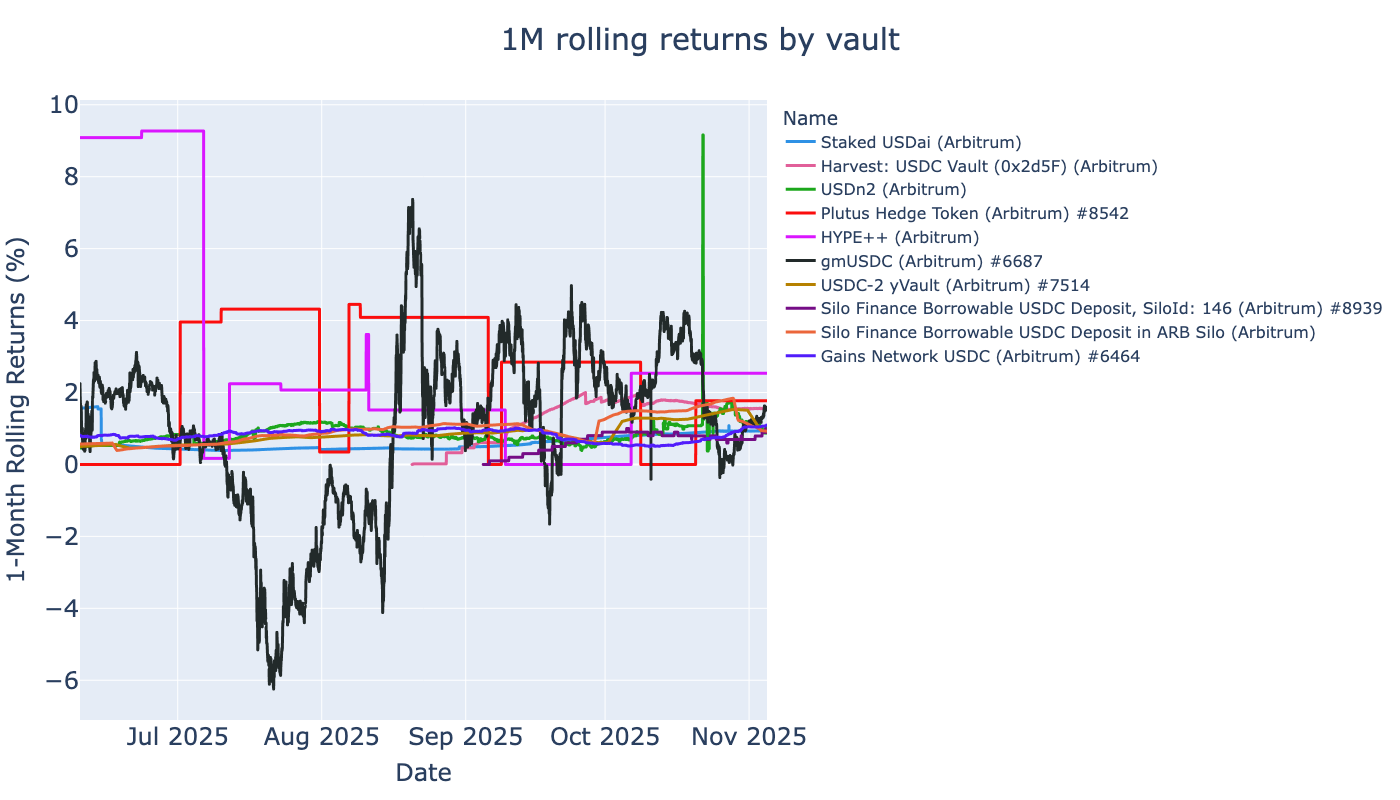

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name  \
#                                                        
1                                               HYPE++   
2                                   Plutus Hedge Token   
3                                               gmUSDC   
4                         Harvest: USDC Vault (0x2d5F)   
5                                   Gains Network USDC   
6                                                USDn2   
7                                         Staked USDai   
8     Silo Finance Borrowable USDC Deposit in ARB Silo   
9    Silo Finance Borrowable USDC Deposit, SiloId: 146   
10                                       USDC-2 yVault   
11                     Concrete USDC MultiSig Strategy   
12                           Nashpoint DeFi & RWA Fund   
13                           Clearstar High Yield USDC   
14                                   Gains Network DAI   
15                             Autopilot USDC Arbitrum   
16                             Yield Chasing Silo USDC   
17                            LazyVault_LowerRisk_USDC   
18                              Clearstar USDC Reactor   
19   Silo Finance Borrowable USDC Deposit, SiloId: 145   
20                                Yield Chasing crvUSD   
21                                      Tokemak arbUSD   
22                                  Yield Chasing USDC   
23                                          autoSUSDai   
24                        Harvest: USDC Vault (0x4A8e)   
25                              Curve Vault for crvUSD   
26                                    MEV Capital USDC   
27                       Avantgarde USDC Core Arbitrum   
28                                      Hyperithm USDC   
29                                      Dolomite: USDC   
30                                          Saving USX   
31                                      Dolomite: USDT   
32                               K3 Capital USDai USDC   
33                                    Yearn Degen USDC   
34                                    Prime Tether USD   
35                                              gmUSDC   
36                                DAMM Stablecoin Fund   
37                                  Gauntlet USDC Core   
38                                     Euler Earn USDC   
39                           Euler Arbitrum Yield USDC   
40                          Steakhouse High Yield USDC   
41                                         Staked USDX   
42                                 Euler Arbitrum USDC   
43                               Steakhouse Prime USDC   
44                                  Frontier Theo USDC   
45                                    Spark USDC Vault   
46                       BasisOS USDC-LINK Hyperliquid   
47                              K3 Capital USDai USDT0   
48                              Curve Vault for crvUSD   
49                                       Yearn OG USDC   
50                  Peapods Interest Bearing USDC - 25   
51                          Wrapped Aave Arbitrum USDT   
52                           Static Aave Arbitrum USDT   
53                                 Gauntlet USDC Prime   
54                                     Fluid Gho Token   
55                          Static Aave Arbitrum USDCn   
56                         Wrapped Aave Arbitrum USDCn   
57                                         dForce USDC   
58                    Crypto.com Defi Wallet AAVE USDT   
59                           Wrapped Aave Arbitrum GHO   
60                                      Fluid USD Coin   
61                            LazyVault_LowerRisk_USDT   
62                Crypto.com Defi Wallet Compound USDC   
63                    Crypto.com Defi Wallet AAVE USDC   
64                     Concrete USDC MultiSig Strategy   
65                                    Fluid Tether USD   
66                          fija Strategy USDC AaveOpt   
67                                         Staked EURA   
68                              Curve Vault for 